# Practico 2 - Exploración Y Curación

En este práctico vamos a continuar el análisis del práctico anterior, aplicandole algunas técnicas de curación y manipulación de datos para profundizar y extender el analisis.

Vamos a enfocarnos en las columnas que tienen mas potencial de analisis y ver de que otras maneras podemos explorar el dataset.

## Consignas
### Para columnas Numéricas

Aplicar los análisis propuestos en las consignas 1 y 2 sobre: *budget, revenue, popularity, vote_average, vote_count, runtime*

1. Establecer reglas de filtrado para los datos anomalos que encuentren en cada variable. 
    - Cada regla tiene que estar justificada por escrito, dando alguna explicación correspondiente a la naturaleza de la variable o cómo se presenta en el dataset.

    - Según el estudio de outliers que hicieron en el práctico anterior, definan filtros para eliminar los outliers siempre que sea funcional al análisis. Justifiquen el porqué de los límites que establezcan. Aquí quiero que entiendan por qué el dato que ven es un outlier y lo expliquen (En caso de que lo hayan hecho en el práctico anterior, no es necesario repetir el análisis).

    - Noten que quiero diferenciar datos erroneos de outliers porque no son lo mismo. Las reglas de filtrado no deberian tratarlos como si lo fueran, o al menos se deberia aclarar si se hacen ambas al mismo tiempo. Traten a las reglas de filtrado como documentacion del proceso

2. Escalado
    - Las distintas columnas numéricas del dataset son distintas en escala y eso dificulta analizar como se relacionan. Elijan algún método para escalarlas entre los que hayan estudiado (StandardScaler, MinMaxScaler, etc.) y aplíquenlo. 

3. Analisis
    - Luego de aplicar las reglas, hagan visualizaciones de las correlaciones entre las distintas columnas y expliquen lo que se vea. El sentido de escalar las variables es poder relacionarlas entre sí, y encontrar la verdadera relación entre ellas, sin la influencia de los rangos que puede tomar cada una.

    - Hacer analisis de correlacion y responder: 
        - ¿Cómo cambia la relación entre popularity y vote_average con las variables escaladas a un mismo rango?
        - Y entre budget y revenue?
        - Entre runtime y budget?
        - (Agregar mas comparaciones si lo desean)
        
4. Construir una variable nueva
    - A diferencia de popularity, vote_average tiene una distribución cercana a la normal. Esto la hace un poco más atractiva a la hora de analizar tendencias. Vamos a utilizar la variable vote_count para darle más peso a vote_average. Sabemos que no es lo mismo una película que fue votada 4 veces que una que fue votada 400 veces. El voto tiene más peso en el último caso. Quiero que construyan una nueva variable "score" que esté conformada por la combinación entre vote_average y vote_count. La variable score la van a calcular a partir de la formula de IMDB para calcular score a partir del voto promedio y la cantidad de votos (Ver anexo)

    - Responder:
        - ¿Hay diferencias entre la nueva columna y vote_average?
        - ¿Cómo se diferencia con popularity?


### Para columnas Categóricas

Elijan al menos una de las siguientes columnas para aplicarle el análisis propuesto en la consigna 1: *genres, original_language, production_companies, production_countries, spoken_languages*

1. Aplicar one-hot encoding o dummy

    - La mayoría de las variables tienen muchas categorías, por lo que el resultado del encoding va a ser una matriz muy extensa en cantidad de columnas. Para evitar esto, vamos a elegir aquellas categorías que sean predominantes y aplicar sobre ellas el análisis. Sobre género, por ejemplo, pueden elegir los 10 o 20 géneros con más películas presentes.

    - Para poder realizar este ejercicio es necesario tener un set único de categorías para las columnas que contienen listas. (realizado en el práctico anterior)

2. Agregar las palabras clave de cada película
    - Usar el archivo 'keywords.csv' para agregar a cada película una columna nueva que contenga una lista con las palabras clave. Por ejemplo, para el caso de Toy Story, la columna "keywords" debería ser: ['jealousy', 'toy', 'boy', 'friendship', 'friends', 'rivalry', 'boy next door', 'new toy', 'toy comes to life'].

    - Una vez hecha la columna, usar los métodos aplicados sobre las otras columnas con listas para analizar la columna keywords.

    - Responder: ¿Hay alguna sensación o grupo de palabras con cierta intención que sea predominante?


## Anexo: Calculo de Score usando la formula de IMDB

Fuente: https://www.kaggle.com/code/ashleshkhajbage/building-movie-recommendation-system

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

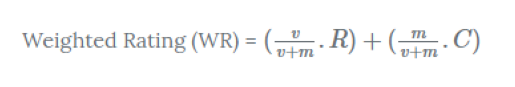

In [4]:
# Imdb's weighted rating formula
plt.imshow(plt.imread('wr.png'))
plt.axis("off")
plt.show()

Donde:

- v: Cantidad de votos de la pelicula
- m: Cantidad minima de votos para ser listada
- R: promedio de votos de la pelicula
- C: promedio de votos de todas las peliculas

In [6]:
# import movies_dataset from csv file
movies_dataset = pd.read_csv('../movies_metadata.csv')

C:\Users\Lucho\AppData\Local\Temp\ipykernel_5936\2782030221.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_dataset = pd.read_csv('../movies_metadata.csv')


In [7]:
# create copy of columns vote_count and vote_average
votes = movies_dataset[['vote_count', 'vote_average']].copy()

In [8]:
C= votes['vote_average'].mean() # promedio de votos
m= votes['vote_count'].quantile(0.9) # usamos el valor del percentil 90 para determinar el piso de votos requeridos para ser considerado

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [10]:
# Calculamos score
votes['score'] = votes.apply(weighted_rating, axis=1)
votes.head(5)

,vote_count,vote_average,score
0,5415.0,7.7,7.640253
1,2413.0,6.9,6.820293
2,92.0,6.5,5.940132
3,34.0,6.1,5.702645
4,173.0,5.7,5.660700
